# Visualize ArcFace Training Logs

Visualize ket qua training tu file `logs_v1.json`

In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (14, 10)
plt.rcParams['font.size'] = 12

In [2]:
def load_logs(filepath):
    with open(filepath, 'r') as f:
        data = json.load(f)
    epochs = [e['epoch'] for e in data['epochs']]
    train_loss = [e['train_loss'] for e in data['epochs']]
    train_acc = [e['train_acc'] for e in data['epochs']]
    val_loss = [e['val_loss'] for e in data['epochs']]
    val_acc = [e['val_acc'] for e in data['epochs']]
    return epochs, train_loss, train_acc, val_loss, val_acc, data.get('summary', {})

In [3]:
logs_path = '../logs/arcface/logs_v1.json'
epochs, train_loss, train_acc, val_loss, val_acc, summary = load_logs(logs_path)

print(f"Total epochs: {len(epochs)}")
print(f"\n=== SUMMARY ===")
if summary:
    print(f"Training time: {summary.get('training_time_hours', 'N/A')} hours")
    print(f"Best val accuracy: {summary.get('best_val_acc', 'N/A')}%")
    print(f"Best val loss: {summary.get('best_val_loss', 'N/A')}")
    print(f"Best epoch: {summary.get('best_epoch', 'N/A')}")
    print(f"Final train accuracy: {summary.get('final_train_acc', 'N/A')}%")
    print(f"Final val accuracy: {summary.get('final_val_acc', 'N/A')}%")

Total epochs: 50

=== SUMMARY ===
Training time: 3.54 hours
Best val accuracy: 80.33%
Best val loss: 1.602
Best epoch: 49
Final train accuracy: 93.75%
Final val accuracy: 80.28%


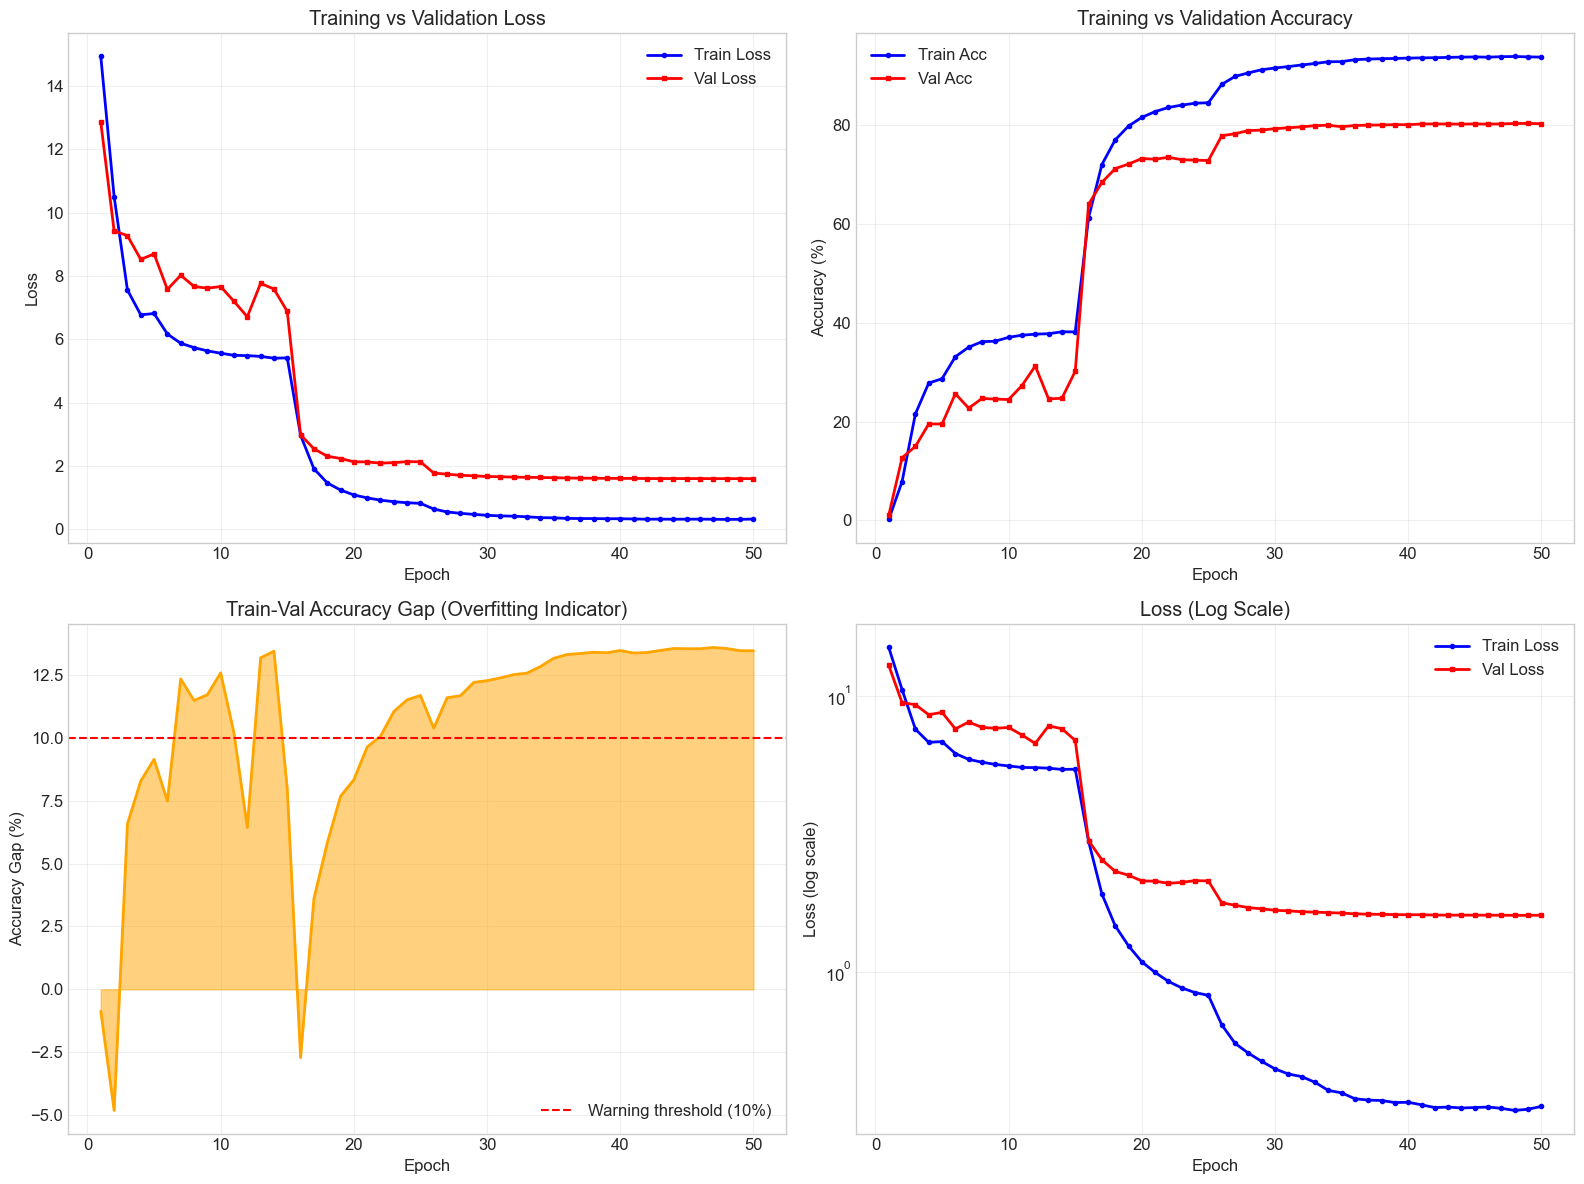


Da luu bieu do vao: ../logs/arcface/training_visualization_v1.png


In [4]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Train vs Val Loss
ax1 = axes[0, 0]
ax1.plot(epochs, train_loss, 'b-', linewidth=2, label='Train Loss', marker='o', markersize=3)
ax1.plot(epochs, val_loss, 'r-', linewidth=2, label='Val Loss', marker='s', markersize=3)
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.set_title('Training vs Validation Loss')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. Train vs Val Accuracy
ax2 = axes[0, 1]
ax2.plot(epochs, train_acc, 'b-', linewidth=2, label='Train Acc', marker='o', markersize=3)
ax2.plot(epochs, val_acc, 'r-', linewidth=2, label='Val Acc', marker='s', markersize=3)
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy (%)')
ax2.set_title('Training vs Validation Accuracy')
ax2.legend()
ax2.grid(True, alpha=0.3)

# 3. Accuracy Gap (Overfitting indicator)
ax3 = axes[1, 0]
acc_gap = np.array(train_acc) - np.array(val_acc)
ax3.fill_between(epochs, acc_gap, alpha=0.5, color='orange')
ax3.plot(epochs, acc_gap, 'orange', linewidth=2)
ax3.set_xlabel('Epoch')
ax3.set_ylabel('Accuracy Gap (%)')
ax3.set_title('Train-Val Accuracy Gap (Overfitting Indicator)')
ax3.axhline(y=10, color='r', linestyle='--', label='Warning threshold (10%)')
ax3.legend()
ax3.grid(True, alpha=0.3)

# 4. Loss in Log Scale
ax4 = axes[1, 1]
ax4.semilogy(epochs, train_loss, 'b-', linewidth=2, label='Train Loss', marker='o', markersize=3)
ax4.semilogy(epochs, val_loss, 'r-', linewidth=2, label='Val Loss', marker='s', markersize=3)
ax4.set_xlabel('Epoch')
ax4.set_ylabel('Loss (log scale)')
ax4.set_title('Loss (Log Scale)')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../logs/arcface/training_visualization_v1.png', dpi=150, bbox_inches='tight')
plt.show()

print("\nDa luu bieu do vao: ../logs/arcface/training_visualization_v1.png")

In [5]:
print("=== PHAN TICH KET QUA TRAINING ===")
print(f"\nFinal Train Accuracy: {train_acc[-1]:.2f}%")
print(f"Final Val Accuracy: {val_acc[-1]:.2f}%")
print(f"Accuracy Gap: {train_acc[-1] - val_acc[-1]:.2f}%")

print(f"\nFinal Train Loss: {train_loss[-1]:.4f}")
print(f"Final Val Loss: {val_loss[-1]:.4f}")

if summary:
    best_epoch = summary.get('best_epoch', len(epochs))
    best_val_acc = summary.get('best_val_acc', max(val_acc))
    print(f"\nBest Epoch: {best_epoch}")
    print(f"Best Val Accuracy: {best_val_acc}%")

gap = train_acc[-1] - val_acc[-1]
if gap > 15:
    print("\n[CANH BAO] Mo hinh co dau hieu overfit nghiem trong (gap > 15%)")
elif gap > 10:
    print("\n[LUU Y] Mo hinh co dau hieu overfit nhe (gap > 10%)")
else:
    print("\n[OK] Mo hinh khong bi overfit nghiem trong")

=== PHAN TICH KET QUA TRAINING ===

Final Train Accuracy: 93.75%
Final Val Accuracy: 80.28%
Accuracy Gap: 13.47%

Final Train Loss: 0.3261
Final Val Loss: 1.6036

Best Epoch: 49
Best Val Accuracy: 80.33%

[LUU Y] Mo hinh co dau hieu overfit nhe (gap > 10%)


In [6]:
from scripts import visualize_logs_merged
visualize_logs_merged.main()


ImportError: cannot import name 'visualize_logs_merged' from 'scripts' (unknown location)